In [1]:
from sunpy.net import Fido, attrs as a
import matplotlib.pyplot as plt
from astropy.time import Time
from sunpy.coordinates import get_body_heliographic_stonyhurst
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

import numpy as np

In [34]:
tstart = '2022-04-22T04:00:00'
tend = '2022-04-22T06:00:00'
event_type = 'FL'
#only c class flares are considered
result = Fido.search(a.Time(tstart,tend), a.hek.EventType(event_type), a.hek.FL.GOESCls > 'M')
print(len(result[0]))
print(result[0][0])


2
gs_thumburl comment_count                                                    hpc_bbox                                                   frm_humanflag     hgc_coord      event_coordsys obs_levelnum     hpc_coord      event_npixels gs_imageurl ar_polarity         frm_paramset                hrc_coord              event_starttime     ar_mtwilsoncls event_type intensmin fl_fluence obs_meanwavel          frm_url          skel_chaincode bound_chaincode noposition fl_fluenceunit active intensmax frm_versionnumber fl_peaktempunit fl_halphaclass area_uncert obs_dataprepurl hpc_geom                                         hgc_bbox                                        intensmedian chaincodetype obs_channelid event_clippedspatial ar_noaaclass          SOL_standard          event_avg_rating eventtype intensunit hpc_boundcc event_mapurl       frm_contact       ar_penumbracls intensmean bound_ccstartc1 frm_name area_atdiskcenter frm_identifier obs_observatory event_description  boundbox_c2ur   ob

In [36]:
#print the x class flares

for i in range(len(result[0])):
    if 'M' in result[0][i]['fl_goescls']:
        print(result[0][i],'\n\n')
        print(result[0][i]['fl_goescls'])
        print(result[0][i]['hpc_x'],result[0][i]['hpc_y'])

gs_thumburl comment_count                                                    hpc_bbox                                                   frm_humanflag     hgc_coord      event_coordsys obs_levelnum     hpc_coord      event_npixels gs_imageurl ar_polarity         frm_paramset                hrc_coord              event_starttime     ar_mtwilsoncls event_type intensmin fl_fluence obs_meanwavel          frm_url          skel_chaincode bound_chaincode noposition fl_fluenceunit active intensmax frm_versionnumber fl_peaktempunit fl_halphaclass area_uncert obs_dataprepurl hpc_geom                                         hgc_bbox                                        intensmedian chaincodetype obs_channelid event_clippedspatial ar_noaaclass          SOL_standard          event_avg_rating eventtype intensunit hpc_boundcc event_mapurl       frm_contact       ar_penumbracls intensmean bound_ccstartc1 frm_name area_atdiskcenter frm_identifier obs_observatory event_description  boundbox_c2ur   obs_

In [4]:
hpc_coordinates = []
cme_times = []
flare_class = []
for i in range(len(result[0])):
    hpc_coordinates.append([result[0][i]['hpc_x'],result[0][i]['hpc_y']])
    cme_times.append(result[0][i]['event_starttime'])
    flare_class.append(result[0][i]['fl_goescls'])
print(flare_class)
# Empty list to store SkyCoord objects
skycoords = []

# Convert each HPC coordinate string to SkyCoord
for hpc_coord,obstime in zip(hpc_coordinates,cme_times):
    skycoord = SkyCoord(hpc_coord[0]*u.arcsec,hpc_coord[1]*u.arcsec,rsun=6695700.0*u.km , observer="earth", obstime=obstime, unit=u.arcsec, frame ='helioprojective')
    skycoord = skycoord.transform_to(frames.HeliographicStonyhurst)
    skycoords.append(skycoord)
print(len(skycoords))
print(skycoords[0])

['C1.5', 'C1.5', 'C3.5', 'C3.5', 'M1.0', 'M1.0', 'C2.6', 'C2.6', 'C6.3', 'C6.3', 'C6.3', 'C3.1', 'C3.1', 'C3.3', 'C3.3', 'C2.2', 'C2.2', 'C3.9', 'C4.4', 'C4.4', 'C4.4', 'C4.4', 'M3.7', 'M3.7', 'M1.6', 'M1.6', 'C3.9', 'C3.0', 'C3.0', 'C3.9', 'C3.9', 'M1.2', 'M1.2', 'M1.2', 'M7.2', 'M7.2', 'C3.8', 'C3.8', 'X2.2', 'X2.2', 'C2.6', 'C2.6', 'C4.0', 'C4.0', 'C4.0', 'C4.3', 'C4.2', 'C4.2', 'C5.1', 'C5.1', 'C3.0', 'C3.0', 'M1.9', 'M1.9', 'C3.1', 'C3.1', 'C7.7', 'C7.7', 'C8.9', 'C8.9', 'C2.3', 'C2.3', 'C2.3', 'C5.6', 'C5.6', 'M9.6', 'M9.6', 'C4.7', 'C3.0', 'C5.4', 'C5.4', 'C3.1', 'C3.1', 'C7.0', 'C7.0', 'C7.0', 'C1.6', 'C1.6', 'C1.6', 'C7.6', 'C7.6', 'M1.1', 'M1.1', 'C1.1', 'C1.1', 'C1.1', 'C1.1', 'C3.5', 'C3.5', 'M3.4', 'M3.4', 'M3.4', 'C3.6', 'C3.6', 'C2.0', 'C2.0', 'C1.6', 'C2.4', 'C2.4', 'C1.1', 'C1.1', 'C1.9', 'C1.9', 'C1.5', 'C1.5', 'C1.5', 'C1.3', 'C1.3', 'C2.5', 'C2.5', 'C1.2', 'C1.2', 'C1.4', 'C1.4', 'C1.4', 'C1.5', 'C1.5', 'C3.7', 'C3.7', 'C2.1', 'C1.6', 'C1.6', 'C2.0', 'C1.0', 'C1.1',

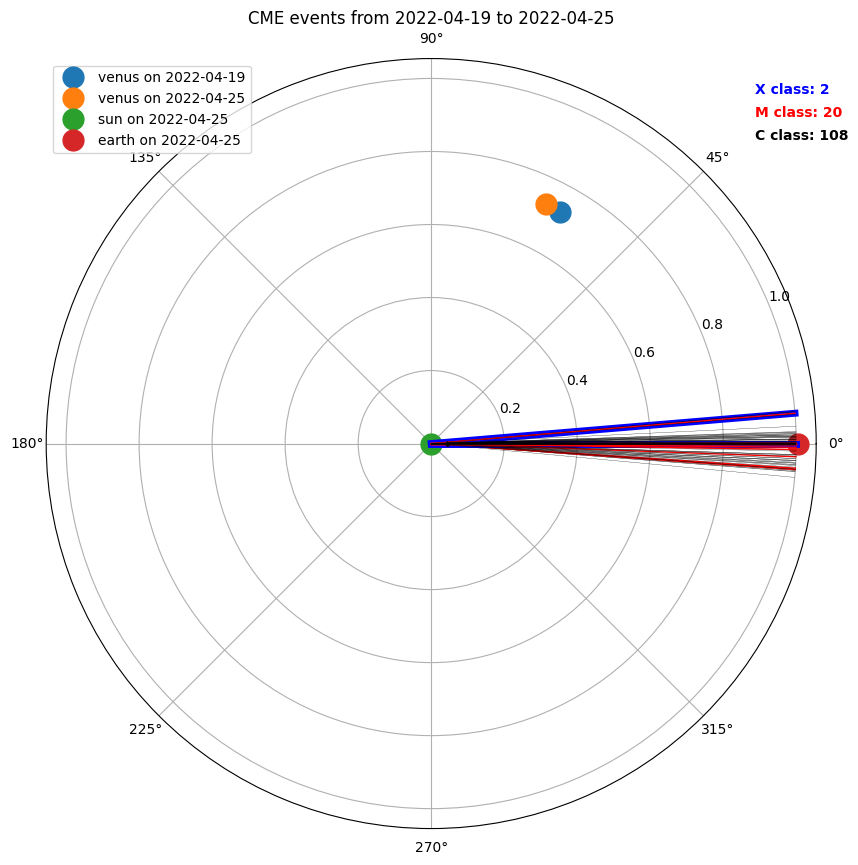

<Figure size 640x480 with 0 Axes>

In [19]:
day1 = Time('2022-04-19T12:00:00')
day5 = Time('2022-04-25T12:00:00')
planet_list1 = ['venus']
planet_list2 = ['sun','earth']
planet_coord1 = [get_body_heliographic_stonyhurst(
    this_planet, time=day1) for this_planet in planet_list1]
planet_coord5 = [get_body_heliographic_stonyhurst(
    this_planet, time=day5) for this_planet in planet_list1]
planet_coord2 = [get_body_heliographic_stonyhurst(
    this_planet, time=day1) for this_planet in planet_list2]

x_count = 0
m_count = 0
c_count = 0

plt.figure(figsize = (10,10)).add_subplot(projection='polar')
for this_planet, this_coord in zip(planet_list1, planet_coord1):
    plt.plot(this_coord.lon.to('rad'), this_coord.radius, 'o', label=this_planet+str(' on ')+str(day1.strftime("%Y-%m-%d")),markersize=15)
for this_planet, this_coord in zip(planet_list1, planet_coord5):
    plt.plot(this_coord.lon.to('rad'), this_coord.radius, 'o', label=this_planet+str(' on ')+str(day5.strftime("%Y-%m-%d")),markersize=15)
for this_planet, this_coord in zip(planet_list2, planet_coord2):
    plt.plot(this_coord.lon.to('rad'), this_coord.radius, 'o', label=this_planet+str(' on ')+str(day5.strftime("%Y-%m-%d")),markersize=15)
for event_coord,fl_class in zip(skycoords,flare_class):
    # if the class is X followed by any string, then plot it in red
    theta = np.linspace(0, 2 * np.pi, 100)
    radius = np.sin(4 * theta)
    line_theta =  event_coord.lon.to('rad').value  # Angle in radians
    line_radius = np.linspace(0, np.max(radius), 100)  # Varying radius values
    plt.plot(event_coord.lon.to('rad'), event_coord.radius, 'x',color='black',markersize=1)
    if 'X' in fl_class:
        x_count += 1
        plt.plot([line_theta]*len(line_radius),line_radius,'b-',linewidth = 5)
    elif 'M' in fl_class:
        m_count += 1
        plt.plot([line_theta]*len(line_radius),line_radius,'r-',linewidth = 1)
    else:
        c_count += 1
        plt.plot([line_theta]*len(line_radius),line_radius,'k-',linewidth = 0.2)
    #plt.plot([line_theta]*len(line_radius),line_radius,'k-')
    #plot the count in the corresponding color of each class in a box
# Format X class text in blue
plt.text(0.92, 0.96, 'X class: '+str(x_count), color='blue', fontweight='bold',
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

# Format M class text in red
plt.text(0.92, 0.93, 'M class: '+str(m_count), color='red', fontweight='bold',
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)

# Format C class text in black
plt.text(0.92, 0.90, 'C class: '+str(c_count), color='black', fontweight='bold',
         horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
#plt.text(0.9, 0.94, 'X class: '+str(x_count)+'\nM class: '+str(m_count)+'\nC class: '+str(c_count), horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black', boxstyle='round'))
    
    #plt.arrow(0,0,event_coord.lon.to('rad').value,event_coord.radius.value*10,lw=2)
# for event_coord in skycoords:
#     plt.plot(event_coord.lon.to('rad'), event_coord.radius, 'x', color='red', markersize=5)
#     arrow_length = event_coord.radius - plt.ylim()[0]  # Length of the arrow
#     arrow_angle = event_coord.lon.to('rad').value - np.pi/2  # Angle of the arrow
#     dx = arrow_length * np.cos(arrow_angle)
#     dy = arrow_length * np.sin(arrow_angle)
#     plt.arrow(0, 0, dx, dy, width=0.02, color='black', lw=2, length_includes_head=True, head_width=0.1, head_length=0.2)
plt.legend(loc = 'upper left')
plt.title('CME events from {} to {}'.format(day1.strftime("%Y-%m-%d"),day5.strftime("%Y-%m-%d")))
plt.show()
plt.savefig('../figures/fl_loc.png',dpi =500)
#plt.savefig('../figures/cme_loc.png',dpi =500)
#max angle: 0.2 * 1 rad = 0.2 rad = 11.5 deg
# total angle = 2*max angle = 23 deg

#### Other databases

Let's try other databases to avoid events directly centered on the Earth

In [171]:
import cdflib

# Open the CDF file
cdf = cdflib.CDF('./STA_L1_STE_20220419_V01.cdf')
#print the data types
print(cdf.cdf_info()['zVariables'])

['Epoch', 'STE_spectra', 'STE_spectra_LABL_1', 'STE_spectra_LABL_2', 'STE_detector', 'STE_mode', 'STE_energy']


In [149]:
# Download the data
files = net.Fido.fetch(query, path='./soho_data')

# Print the downloaded files
print(files)

<sunpy.net.fido_factory.UnifiedResponse object at 0x0000024BC5721450>
Results from 0 Providers: